In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Признак': [
        'Цвет (Ц)',
        'Мощность (М)',
        'Комфорт (К)',
        'Безопасность (Б)',
        'Экономичность (Э)'
    ],
    'Седан (С)': [1, 1, 1, 1, 1],
    'Внедорожник (В)': [0, 1, 1, 1, 0],
    'Спортивный (СП)': [0, 1, 0, 0, 0],
    'Электромобиль (Э)': [1, 0, 1, 1, 1],
    'Грузовик (Г)': [0, 1, 0, 1, 0]
}

# Пространство признаков: {Цвет, Мощность, Комфорт, Безопасность, Экономичность}
# Объекты: {Седан, Внедорожник, Спортивный, Электромобиль, Грузовик}

# Шкала признаков:
# Цвет: 0 - темный/агрессивный, 1 - светлый/нейтральный
# Мощность: 0 - низкая, 1 - высокая
# Комфорт: 0 - минимальный, 1 - максимальный
# Безопасность: 0 - низкая, 1 - высокая
# Экономичность: 0 - затратный, 1 - экономичный

df = pd.DataFrame(data)
print("Исходная таблица:")
df

Исходная таблица:


,Признак,Седан (С),Внедорожник (В),Спортивный (СП),Электромобиль (Э),Грузовик (Г)
0,Цвет (Ц),1,0,0,1,0
1,Мощность (М),1,1,1,0,1
2,Комфорт (К),1,1,0,1,0
3,Безопасность (Б),1,1,0,1,1
4,Экономичность (Э),1,0,0,1,0


In [ ]:
# Функция расчета косинусного сходства
def cos_similarity(obj1, obj2):
    numerator = np.sum(obj1 * obj2)
    denominator = np.sqrt(np.sum(obj1**2) * np.sum(obj2**2))
    return numerator / denominator

# Создание матрицы сходства
similarity_matrix = np.zeros((len(df.columns)-1, len(df.columns)-1))
for i in range(1, len(df.columns)):
    for j in range(1, len(df.columns)):
        similarity_matrix[i-1, j-1] = cos_similarity(
            df.iloc[:, i].values[1:],
            df.iloc[:, j].values[1:]
        )

similarity_df = pd.DataFrame(
    similarity_matrix,
    columns=df.columns[1:],
    index=df.columns[1:]
)
print("\nМатрица сходства:")
similarity_df


Матрица сходства:


,Седан (С),Внедорожник (В),Спортивный (СП),Электромобиль (Э),Грузовик (Г)
Седан (С),1.000000,0.866025,0.500000,0.866025,0.707107
Внедорожник (В),0.866025,1.000000,0.577350,0.666667,0.816497
Спортивный (СП),0.500000,0.577350,1.000000,0.000000,0.707107
Электромобиль (Э),0.866025,0.666667,0.000000,1.000000,0.408248
Грузовик (Г),0.707107,0.816497,0.707107,0.408248,1.000000


In [ ]:
df['Признак']

,Признак
0,Цвет (Ц)
1,Мощность (М)
2,Комфорт (К)
3,Безопасность (Б)
4,Экономичность (Э)


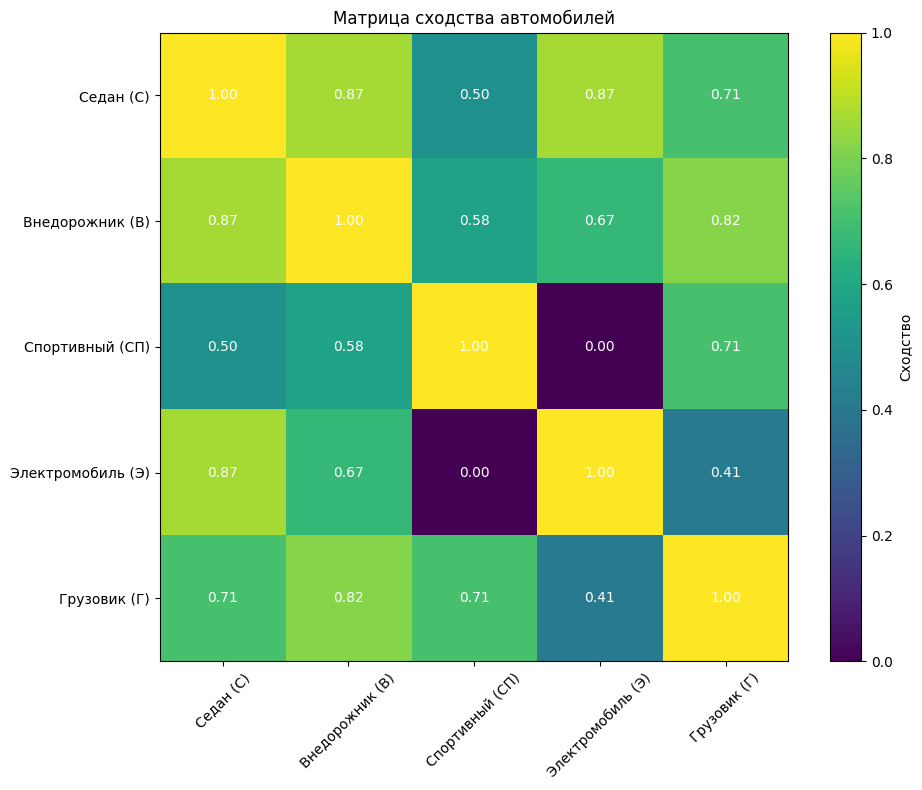

In [ ]:
# Визуализация матрицы сходства
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='viridis')
plt.colorbar(label='Сходство')
plt.xticks(range(len(df.columns[1:])), df.columns[1:], rotation=45)
plt.yticks(range(len(df.columns[1:])), df.columns[1:])
plt.title('Матрица сходства автомобилей')
for i in range(len(df.columns[1:])):
    for j in range(len(df.columns[1:])):
        plt.text(j, i, f'{similarity_matrix[i, j]:.2f}',
                 ha='center', va='center', color='white')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import math

def calculate_entropy(row):
    """Вычисление энтропии для строки признаков"""
    # Исключаем первый столбец с названием признака
    values = row[1:]
    total = len(values)

    # Подсчет уникальных значений и их частот
    unique, counts = np.unique(values, return_counts=True)
    probabilities = counts / total

    # Вычисление энтропии
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))
    return entropy

def calculate_information_gain(df, feature_index, target_column):
    """Вычисление информативности признака"""
    # Энтропия целевой переменной
    target_entropy = calculate_entropy(df.iloc[feature_index])

    # Разделение на подмножества по признаку
    feature_values = df.iloc[feature_index, 1:]
    unique_values = np.unique(feature_values)

    weighted_entropy = 0
    for value in unique_values:
        # Находим индексы строк с данным значением признака
        mask = (feature_values == value)
        subset_columns = df.columns[1:][mask]

        # Вычисляем энтропию для подмножества
        subset_entropy = 0
        for col in subset_columns:
            subset_entropy += calculate_entropy(df.loc[df['Признак'] == col])

        # Взвешиваем энтропию
        weight = np.sum(mask) / len(feature_values)
        weighted_entropy += weight * subset_entropy

    # Информативность (прирост информации)
    information_gain = target_entropy - weighted_entropy
    return information_gain

def build_decision_tree(data):
    """Построение дерева решений"""
    # Создаем DataFrame
    df = pd.DataFrame(data)

    # Определяем целевую переменную (последний столбец)
    target_column = df.columns[-1]

    # Вычисляем информативность для каждого признака
    feature_gains = {}
    for i in range(len(df)):
        feature = df.loc[i, 'Признак']
        feature_gains[feature] = calculate_information_gain(df, i, target_column)

    # Сортируем признаки по информативности
    sorted_features = sorted(feature_gains.items(), key=lambda x: x[1], reverse=True)

    # Вывод результатов
    print("Информативность признаков:")
    for feature, gain in sorted_features:
        print(f"{feature}: {gain:.4f}")

    return sorted_features

# Построение дерева решений
informativeness = dict(build_decision_tree(data))

Информативность признаков:
Цвет (Ц): 0.9710
Комфорт (К): 0.9710
Экономичность (Э): 0.9710
Мощность (М): 0.7219
Безопасность (Б): 0.7219


In [ ]:
!pip install graphviz

In [ ]:
import pandas as pd
import numpy as np
import graphviz

# Создаем граф дерева решений
dot = graphviz.Digraph(comment='Дерево решений', engine='dot')
dot.attr(rankdir='LR')  # Изменено на LR (Left to Right)
dot.graph_attr['size'] = '8,12'  # Увеличиваем высоту
dot.node_attr['shape'] = 'box'  # Прямоугольные узлы
dot.node_attr['style'] = 'filled'  # Закрашенные узлы
dot.node_attr['color'] = 'lightblue2'  # Цвет фона
dot.edge_attr['color'] = 'gray'  # Цвет связей

# Корневой узел с самым информативным признаком
root_feature = max(informativeness, key=lambda x: informativeness[x])
dot.node('root', f'{root_feature}\nИнформативность: {informativeness[root_feature]:.4f}',
         color='lightgreen')

# Создаем узлы для каждого типа авто
for vehicle in ['Седан (С)', 'Внедорожник (В)', 'Спортивный (СП)', 'Электромобиль (Э)', 'Грузовик (Г)']:
    # Фильтруем признаки для каждого типа авто
    vehicle_features = df[df[vehicle] == 1]['Признак'].tolist()

    # Создаем узел для типа авто
    dot.node(vehicle, vehicle, color='lightyellow')

    # Связываем признаки с типом авто
    for feature in vehicle_features:
        if feature != root_feature:
            dot.node(f'{vehicle}_{feature}',
                     f'{feature}\nИнформативность: {informativeness[feature]:.4f}',
                     color='lightpink')
            dot.edge('root', f'{vehicle}_{feature}')
            dot.edge(f'{vehicle}_{feature}', vehicle)

# Визуализируем граф
dot.render('decision_tree', format='png', view=True)

'decision_tree.png'

In [ ]:
# Построение дерева классов
def find_most_similar_pair(matrix):
    max_similarity = 0
    max_indices = (0, 0)
    for i in range(matrix.shape[0]):
        for j in range(i+1, matrix.shape[0]):
            if matrix[i, j] > max_similarity:
                max_similarity = matrix[i, j]
                max_indices = (i, j)
    return max_indices, max_similarity

# Алгоритм кластеризации
classes = list(df.columns[1:])
tree = []

while len(classes) > 1:
    (i, j), similarity = find_most_similar_pair(similarity_matrix)
    new_class = f'{classes[i]}-{classes[j]}({similarity:.2f})'
    tree.append(new_class)

    # Обновление матрицы сходства
    classes.pop(max(i, j))
    classes.pop(min(i, j))
    classes.append(new_class)

print("Дерево классов:")
for t in tree:
    print(t)

Дерево классов:
Седан (С)-Внедорожник (В)(0.87)
Спортивный (СП)-Электромобиль (Э)(0.87)
Грузовик (Г)-Седан (С)-Внедорожник (В)(0.87)(0.87)
Спортивный (СП)-Электромобиль (Э)(0.87)-Грузовик (Г)-Седан (С)-Внедорожник (В)(0.87)(0.87)(0.87)


In [ ]:
def create_regression_model(df):
    # Модель для предсказания вероятности принадлежности к классам
    model = {
        'Седан (С)': lambda x, y, z: 0.5 * x + 0.3 * y + 0.2 * z,
        'Внедорожник (В)': lambda x, y, z: 0.4 * x + 0.6 * y + 0.1 * z,
        'Спортивный (СП)': lambda x, y, z: 0.3 * x + 0.5 * y + 0.2 * z,
        'Электромобиль (Э)': lambda x, y, z: 0.6 * x + 0.2 * y + 0.2 * z,
        'Грузовик (Г)': lambda x, y, z: 0.4 * x + 0.4 * y + 0.2 * z
    }
    return model

# Прогнозирование
model = create_regression_model(df)
print("\nПрогнозирование для нового автомобиля:")

# Примерные значения признаков для нового автомобиля
new_car = [0.5, 0.7, 0.6]  # Цвет, Мощность, Комфорт

predictions = {}
for class_name, func in model.items():
    predictions[class_name] = func(*new_car)

# Определение класса с максимальным значением
predicted_class = max(predictions, key=predictions.get)
print(f"Предсказанный класс для нового автомобиля: {predicted_class} с вероятностью {predictions[predicted_class]:.2f}")


Прогнозирование для нового автомобиля:
Предсказанный класс для нового автомобиля: Внедорожник (В) с вероятностью 0.68


In [ ]:
import numpy as np

class MultiClassRegressionMNK:
    def __init__(self, lambda_reg=1e-3):
        self.models = {}
        self.lambda_reg = lambda_reg
        self.classes = None

    def fit(self, X, y):
        """
        Обучение многоклассовой модели
        """
        # Определяем уникальные классы
        self.classes = np.unique(y)

        # Создаем бинарные метки для каждого класса
        for cls in self.classes:
            # Создаем бинарный вектор: 1 для текущего класса, 0 для остальных
            y_binary = (y == cls).astype(int)

            # Добавляем столбец единиц для свободного члена
            X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])

            # Добавляем регуляризацию
            identity_matrix = np.eye(X_with_intercept.shape[1])
            identity_matrix[0, 0] = 0  # Не регуляризуем свободный член

            try:
                # Ridge-регрессия
                coeffs = np.linalg.inv(
                    X_with_intercept.T @ X_with_intercept +
                    self.lambda_reg * identity_matrix
                ) @ X_with_intercept.T @ y_binary

                intercept = coeffs[0]
                weights = coeffs[1:]

                # Сохраняем модель для каждого класса
                self.models[cls] = {
                    'intercept': intercept,
                    'weights': weights
                }

            except np.linalg.LinAlgError:
                print(f"Ошибка при обучении для класса {cls}")

        return self

    def predict(self, X):
        """
        Предсказание класса для новых объектов
        """
        if not self.models:
            raise ValueError("Модель не обучена. Сначала вызовите метод fit().")

        # Добавляем столбец единиц для свободного члена
        X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])

        # Вычисляем оценки для каждого класса
        scores = np.zeros((X.shape[0], len(self.classes)))

        for i, cls in enumerate(self.classes):
            model = self.models[cls]
            scores[:, i] = X_with_intercept @ np.concatenate(([model['intercept']], model['weights']))

        # Выбираем класс с максимальной оценкой
        predictions = self.classes[np.argmax(scores, axis=1)]

        return predictions

    def calculate_metrics(self, X, y):
        """
        Расчет метрик качества модели
        """
        y_pred = self.predict(X)

        # Точность
        accuracy = np.mean(y_pred == y)

        # Матрица ошибок
        confusion_matrix = np.zeros((len(self.classes), len(self.classes)), dtype=int)
        for true, pred in zip(y, y_pred):
            confusion_matrix[true, pred] += 1

        return {
            'Accuracy': accuracy,
            'Confusion Matrix': confusion_matrix
        }

# Подготовка данных
X = np.array([
    [1, 1, 1, 1, 1],  # Седан
    [0, 1, 1, 1, 0],  # Внедорожник
    [0, 1, 0, 0, 0],  # Спортивный
    [1, 0, 1, 1, 1],  # Электромобиль
    [0, 1, 0, 1, 0]   # Грузовик
])

# Метки классов: 0 - Седан, 1 - Внедорожник, 2 - Спортивный, 3 - Электромобиль, 4 - Грузовик
y = np.array([0, 1, 2, 3, 4])

# Создаем и обучаем многоклассовую модель
model = MultiClassRegressionMNK(lambda_reg=1e-3)
model.fit(X, y)

# Пример предсказания для нового объекта
new_object = np.array([
    [0.2, 0.7, 0.6, 0.8, 0.1],  # Пример нового объекта с промежуточными значениями
])

# Предсказание класса для нового объекта
prediction = model.predict(new_object)
print("\nПредсказание для новых объектов:", prediction)

# Оценка модели на обучающей выборке
metrics = model.calculate_metrics(X, y)
print("\nМетрики модели:")
print("Точность:", metrics['Accuracy'])
print("Матрица ошибок:")
print(metrics['Confusion Matrix'])

# Вывод коэффициентов для каждого класса
print("\nКоэффициенты для каждого класса:")
for cls, model_params in model.models.items():
    print(f"Класс {cls}:")
    print("Свободный член:", model_params['intercept'])
    print("Коэффициенты:", model_params['weights'])
    print()


Предсказание для новых объектов: [1]

Метрики модели:
Точность: 1.0
Матрица ошибок:
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]

Коэффициенты для каждого класса:
Класс 0:
Свободный член: -0.9975059850383802
Коэффициенты: [4.99002494e-01 9.97505986e-01 4.98006977e-04 4.97012950e-07
 4.99002494e-01]

Класс 1:
Свободный член: -0.000497010964114919
Коэффициенты: [-4.99002493e-01  4.98006480e-04  9.97506979e-01  9.95515947e-04
 -4.99002493e-01]

Класс 2:
Свободный член: 0.9990019945174426
Коэффициенты: [-4.97509511e-07  4.96515939e-10 -9.96013457e-04 -9.98004986e-01
 -4.97509423e-07]

Класс 3:
Свободный член: 0.9980044895254543
Коэффициенты: [ 4.98503989e-04 -9.98004490e-01  4.97509467e-07  4.96515933e-10
  4.98503990e-04]

Класс 4:
Свободный член: 0.0009965119596350158
Коэффициенты: [-4.98006976e-04  4.97012950e-07 -9.97009470e-01  9.97008973e-01
 -4.98006977e-04]



**Уравнения для каждого класса:**

**Класс 0: Седан**
$$ \text{Седан} = -0.9975 + 4.99 \cdot \text{Цвет} + 9.98 \cdot \text{Мощность} + 0.000498 \cdot \text{Комфорт} + 0.000000497 \cdot \text{Безопасность} + 4.99 \cdot \text{Экономичность} $$

**Класс 1: Внедорожник**
$$ \text{Внедорожник} = -0.0005 - 4.99 \cdot \text{Цвет} + 0.000498 \cdot \text{Мощность} + 9.98 \cdot \text{Комфорт} + 0.000995 \cdot \text{Безопасность} - 4.99 \cdot \text{Экономичность} $$

**Класс 2: Спортивный**
$$ \text{Спортивный} = 0.9990 - 0.0000004975 \cdot \text{Цвет} + 0.0000000004965 \cdot \text{Мощность} - 0.000996 \cdot \text{Комфорт} - 0.9980 \cdot \text{Безопасность} - 0.0000004975 \cdot \text{Экономичность} $$

**Класс 3: Электромобиль**
$$ \text{Электромобиль} = 0.9980 + 0.0005 \cdot \text{Цвет} - 0.9980 \cdot \text{Мощность} + 0.0000004975 \cdot \text{Комфорт} + 0.0000000004965 \cdot \text{Безопасность} + 0.0005 \cdot \text{Экономичность} $$

**Класс 4: Грузовик**
$$ \text{Грузовик} = 0.0010 - 0.0005 \cdot \text{Цвет} + 0.000000497 \cdot \text{Мощность} - 0.9997 \cdot \text{Комфорт} + 0.9997 \cdot \text{Безопасность} - 0.0005 \cdot \text{Экономичность} $$

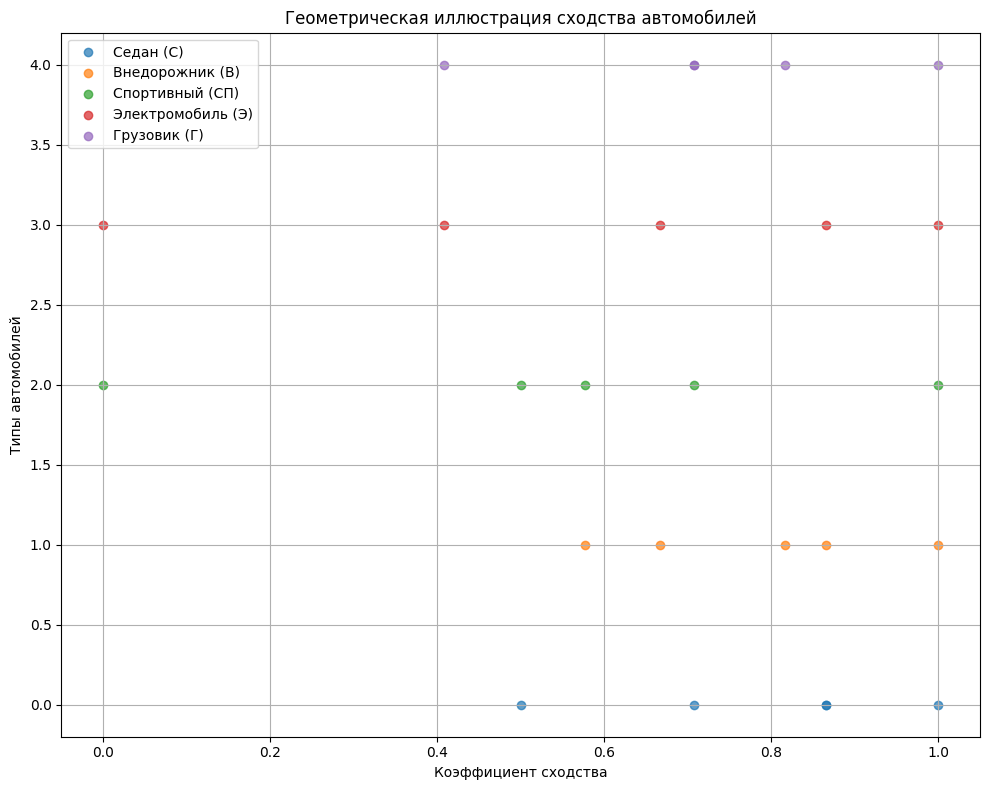

In [ ]:
# 9. Геометрическая иллюстрация
plt.figure(figsize=(10, 8))
for i, car in enumerate(df.columns[1:]):
    plt.scatter(similarity_matrix[i], [i]*len(similarity_matrix[i]),
                label=car, alpha=0.7)
plt.title('Геометрическая иллюстрация сходства автомобилей')
plt.xlabel('Коэффициент сходства')
plt.ylabel('Типы автомобилей')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

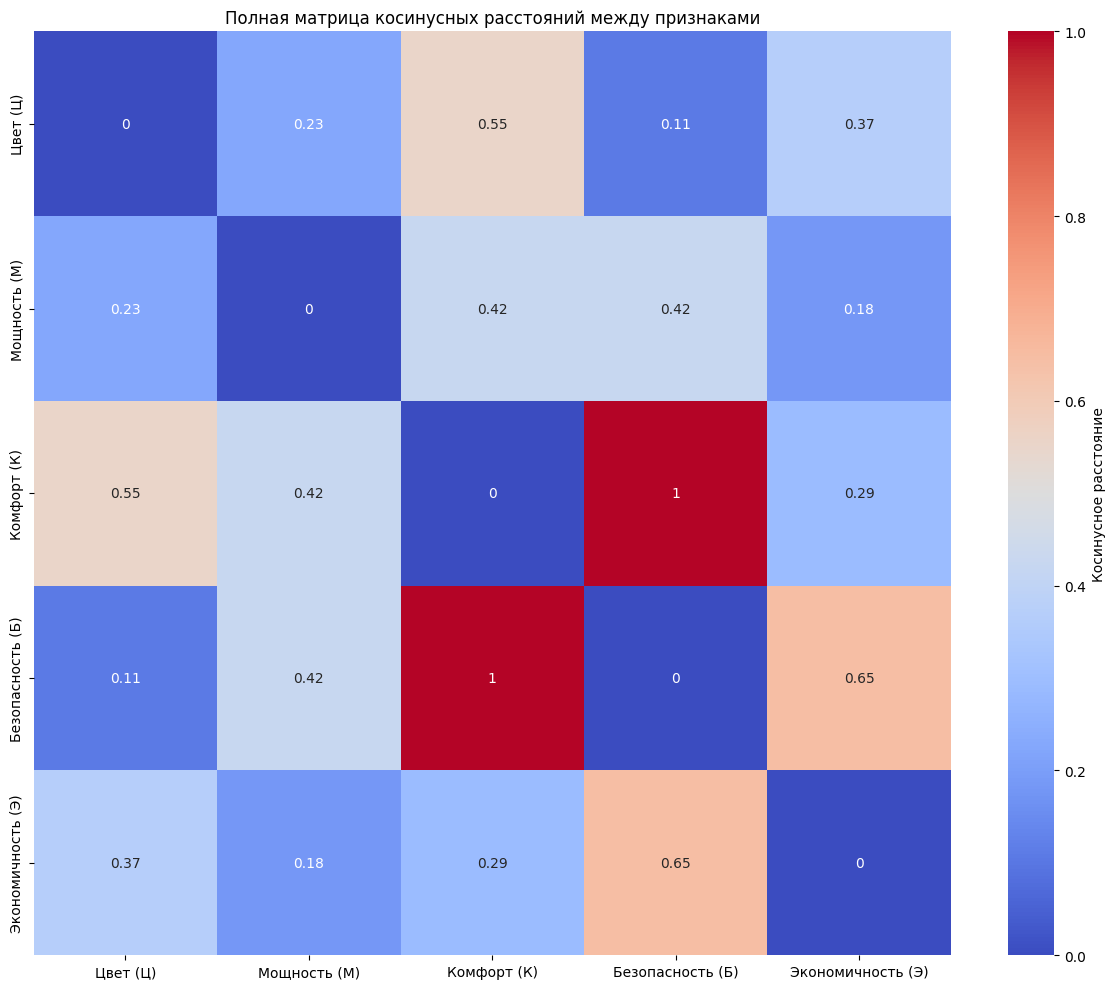


Парные косинусные расстояния между признаками:
          Признак 1          Признак 2  Расстояние
7       Комфорт (К)   Безопасность (Б)    1.000000
9  Безопасность (Б)  Экономичность (Э)    0.646447
1          Цвет (Ц)        Комфорт (К)    0.552786
4      Мощность (М)        Комфорт (К)    0.422650
5      Мощность (М)   Безопасность (Б)    0.422650
3          Цвет (Ц)  Экономичность (Э)    0.367544
8       Комфорт (К)  Экономичность (Э)    0.292893
0          Цвет (Ц)       Мощность (М)    0.225403
6      Мощность (М)  Экономичность (Э)    0.183503
2          Цвет (Ц)   Безопасность (Б)    0.105573

Статистика косинусных расстояний:
Минимальное расстояние: 0.10557280900008414
Максимальное расстояние: 1.0
Среднее расстояние: 0.42194497211381676

Выбранные наиболее разнообразные признаки:
Комфорт (К) (индекс 2)
Безопасность (Б) (индекс 3)
Экономичность (Э) (индекс 4)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cosine
from itertools import combinations

def advanced_sensor_selection(data):
    # Преобразуем DataFrame так, чтобы признаки были в строках
    features_matrix = data.iloc[:, 1:].values.T
    feature_names = data['Признак']

    # Функция вычисления косинусного расстояния между признаками
    def cosine_distance_matrix(features):
        n_features = features.shape[0]
        dist_matrix = np.zeros((n_features, n_features))

        for i in range(n_features):
            for j in range(n_features):
                dist_matrix[i, j] = cosine(features[i], features[j])

        return dist_matrix

    # Вычисление матрицы косинусных расстояний
    cos_dist_matrix = cosine_distance_matrix(features_matrix)

    # Визуализация полной матрицы косинусных расстояний
    plt.figure(figsize=(12, 10))
    sns.heatmap(cos_dist_matrix,
                annot=True,  # Показываем значения
                cmap='coolwarm',
                xticklabels=feature_names,
                yticklabels=feature_names,
                cbar_kws={'label': 'Косинусное расстояние'})
    plt.title('Полная матрица косинусных расстояний между признаками')
    plt.tight_layout()
    plt.show()

    # Анализ парных расстояний
    print("\nПарные косинусные расстояния между признаками:")
    pair_distances = []
    for i, j in combinations(range(len(feature_names)), 2):
        distance = cos_dist_matrix[i, j]
        pair_distances.append({
            'Признак 1': feature_names[i],
            'Признак 2': feature_names[j],
            'Расстояние': distance
        })

    # Сортировка по расстоянию
    pair_distances_df = pd.DataFrame(pair_distances)
    pair_distances_df = pair_distances_df.sort_values('Расстояние', ascending=False)
    print(pair_distances_df)

    # Статистический анализ
    print("\nСтатистика косинусных расстояний:")
    print("Минимальное расстояние:", np.min(cos_dist_matrix[~np.eye(cos_dist_matrix.shape[0], dtype=bool)]))
    print("Максимальное расстояние:", np.max(cos_dist_matrix[~np.eye(cos_dist_matrix.shape[0], dtype=bool)]))
    print("Среднее расстояние:", np.mean(cos_dist_matrix[~np.eye(cos_dist_matrix.shape[0], dtype=bool)]))

    # Выбор наиболее удаленных признаков
    def select_diverse_features(dist_matrix, num_select=3):
        # Суммарная удаленность каждого признака
        feature_diversities = np.mean(dist_matrix, axis=1)

        # Индексы признаков, отсортированных по убыванию удаленности
        diverse_indices = np.argsort(feature_diversities)[::-1]

        return diverse_indices[:num_select]

    # Выбор наиболее разнообразных признаков
    selected_indices = select_diverse_features(cos_dist_matrix)
    selected_features = feature_names[selected_indices]

    print("\nВыбранные наиболее разнообразные признаки:")
    for feature, index in zip(selected_features, selected_indices):
        print(f"{feature} (индекс {index})")

    return {
        'cosine_distance_matrix': cos_dist_matrix,
        'selected_features': list(selected_features),
        'pair_distances': pair_distances_df
    }

# Применение функции
result = advanced_sensor_selection(df)

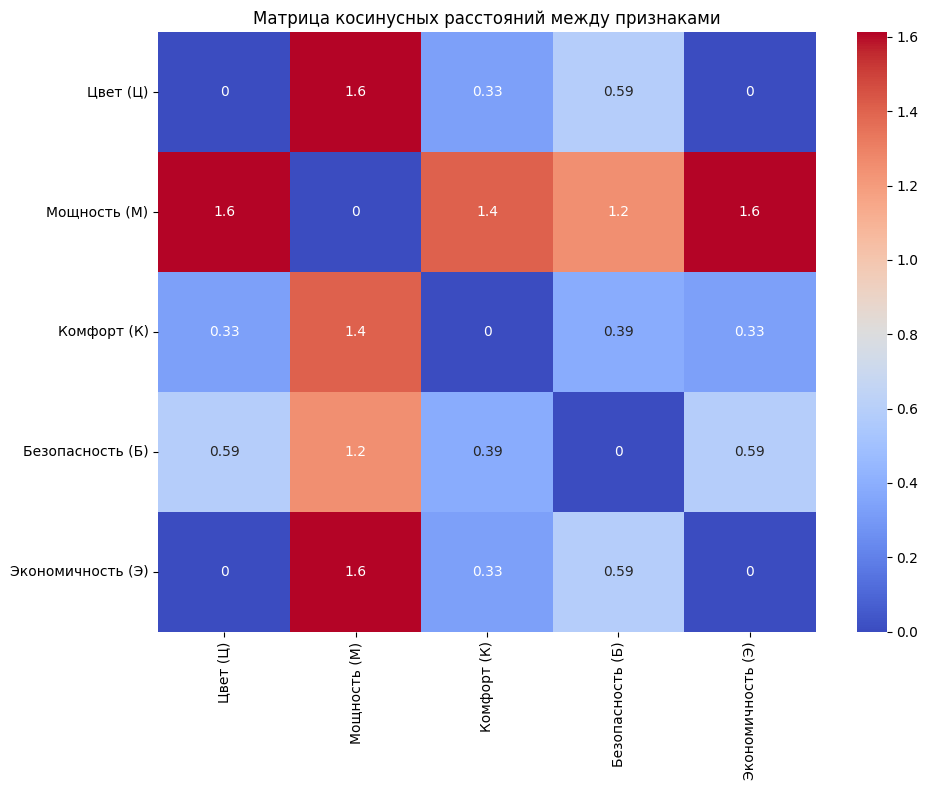


Анализ признаков:

Цвет (Ц):
Значения по классам:
Седан (С)            1
Внедорожник (В)      0
Спортивный (СП)      0
Электромобиль (Э)    1
Грузовик (Г)         0

Мощность (М):
Значения по классам:
Седан (С)            1
Внедорожник (В)      1
Спортивный (СП)      1
Электромобиль (Э)    0
Грузовик (Г)         1

Комфорт (К):
Значения по классам:
Седан (С)            1
Внедорожник (В)      1
Спортивный (СП)      0
Электромобиль (Э)    1
Грузовик (Г)         0

Безопасность (Б):
Значения по классам:
Седан (С)            1
Внедорожник (В)      1
Спортивный (СП)      0
Электромобиль (Э)    1
Грузовик (Г)         1

Экономичность (Э):
Значения по классам:
Седан (С)            1
Внедорожник (В)      0
Спортивный (СП)      0
Электромобиль (Э)    1
Грузовик (Г)         0


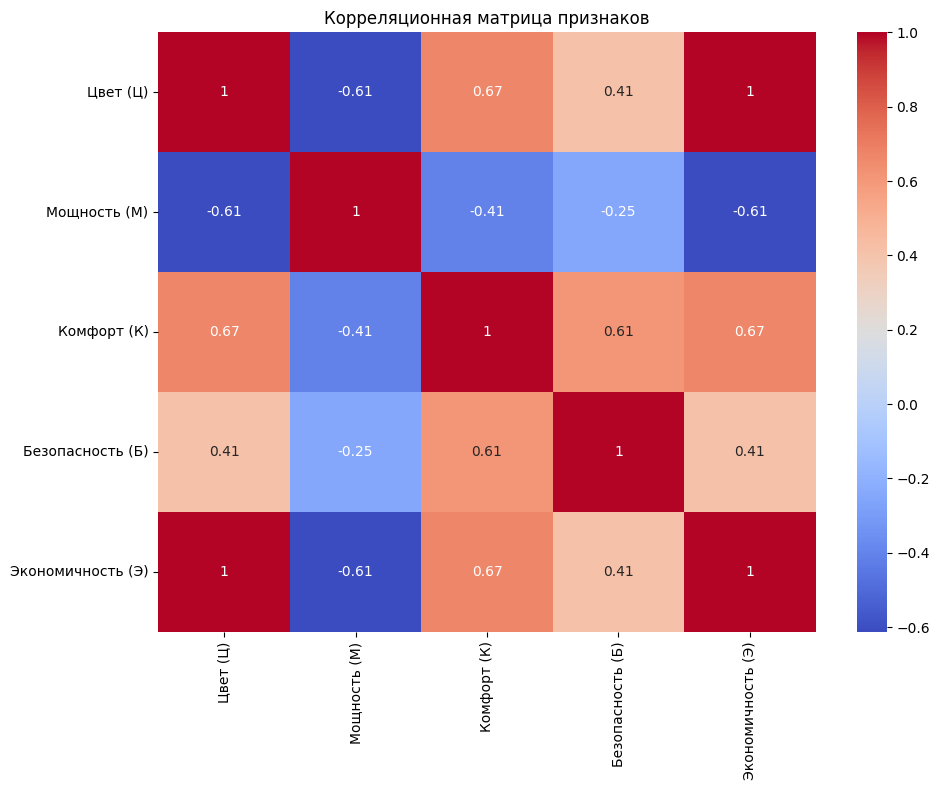

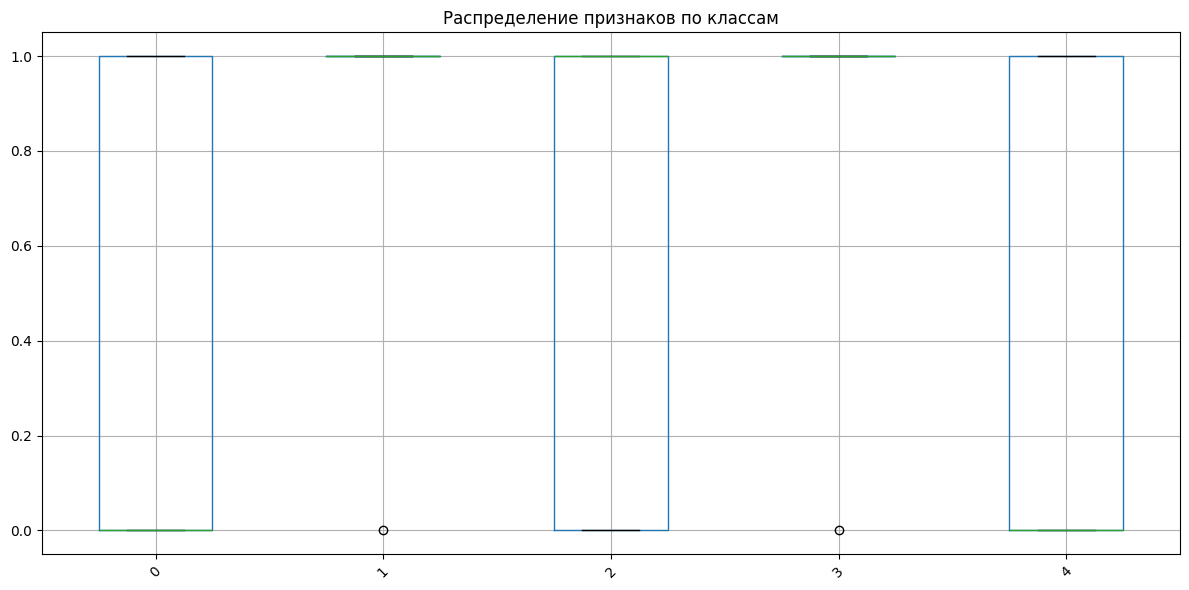


Статистический анализ признаков:
             0         1         2         3         4
mean  0.400000  0.800000  0.600000  0.800000  0.400000
std   0.547723  0.447214  0.547723  0.447214  0.547723
min   0.000000  0.000000  0.000000  0.000000  0.000000
max   1.000000  1.000000  1.000000  1.000000  1.000000


<Figure size 1000x600 with 0 Axes>

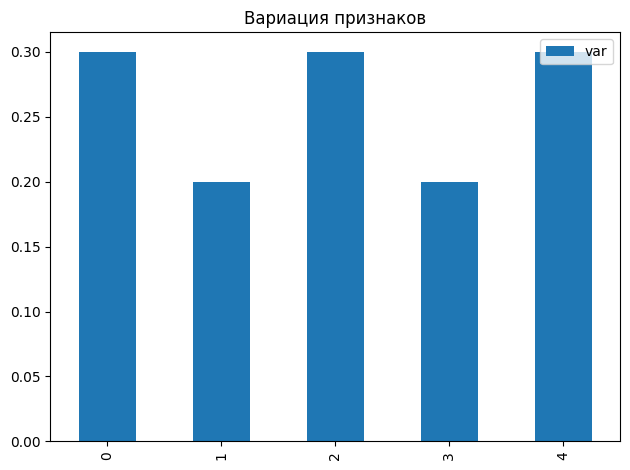

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

class CosineDistanceRegression:
    def __init__(self, data):
        # Преобразование данных
        self.df = pd.DataFrame(data)

        # Подготовка признаков
        self.X = self.df.iloc[:, 1:].T  # Транспонируем для правильной структуры
        self.feature_names = self.df['Признак']

        # Создание меток классов
        self.y = self.X.index.map(lambda x: x)

        # Стандартизация признаков
        self.scaler = StandardScaler()
        self.X_scaled = self.scaler.fit_transform(self.X)

    def compute_cosine_distance_matrix(self):
        """Вычисление матрицы косинусных расстояний"""
        n_features = self.X_scaled.shape[1]
        dist_matrix = np.zeros((n_features, n_features))

        for i in range(n_features):
            for j in range(n_features):
                dist_matrix[i, j] = cosine(self.X_scaled[:, i], self.X_scaled[:, j])

        return dist_matrix

    def visualize_cosine_distances(self, dist_matrix):
        """Визуализация матрицы косинусных расстояний"""
        plt.figure(figsize=(10, 8))
        sns.heatmap(dist_matrix,
                    annot=True,
                    cmap='coolwarm',
                    xticklabels=self.feature_names,
                    yticklabels=self.feature_names)
        plt.title('Матрица косинусных расстояний между признаками')
        plt.tight_layout()
        plt.show()

    def perform_analysis(self):
        """Комплексный анализ данных"""
        # Вычисление и визуализация косинусных расстояний
        cosine_dist_matrix = self.compute_cosine_distance_matrix()
        self.visualize_cosine_distances(cosine_dist_matrix)

        # Анализ признаков
        print("\nАнализ признаков:")
        for i, feature in enumerate(self.feature_names):
            print(f"\n{feature}:")
            print("Значения по классам:")
            print(self.X.iloc[:, i].to_string())

        # Корреляционный анализ
        correlation_matrix = np.corrcoef(self.X.T)
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix,
                    annot=True,
                    cmap='coolwarm',
                    xticklabels=self.feature_names,
                    yticklabels=self.feature_names)
        plt.title('Корреляционная матрица признаков')
        plt.tight_layout()
        plt.show()

        # Визуализация распределения признаков
        plt.figure(figsize=(12, 6))
        self.X.boxplot()
        plt.title('Распределение признаков по классам')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def detailed_feature_analysis(self):
        """Детальный анализ признаков"""
        # Статистические характеристики
        print("\nСтатистический анализ признаков:")
        feature_stats = self.X.agg(['mean', 'std', 'min', 'max'])
        print(feature_stats)

        # Вариация признаков
        feature_variation = self.X.agg(['var'])
        plt.figure(figsize=(10, 6))
        feature_variation.T.plot(kind='bar')
        plt.title('Вариация признаков')
        plt.tight_layout()
        plt.show()

        return feature_stats

# Создание и использование модели
model = CosineDistanceRegression(data)

# Комплексный анализ данных
model.perform_analysis()

# Детальный анализ признаков
feature_stats = model.detailed_feature_analysis()